<a href="https://colab.research.google.com/github/saadrza/DA-Project2/blob/main/13_Shop_Customer_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2 - Project 13 - Customer Clustering
## Simone Tarenzi, Saad Raza Hussain Shafi

## Importing the data

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder


customers = pd.read_csv('Customers.csv')

In [57]:
customers

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [58]:
customers.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [59]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,2000.0,1000.5000,577.494589,1.0,500.75,1000.5,1500.25,2000.0
Age,2000.0,48.9600,28.429747,0.0,25.00,48.0,73.00,99.0
Annual Income ($),2000.0,110731.8215,45739.536688,0.0,74572.00,110045.0,149092.75,189974.0
Spending Score (1-100),2000.0,50.9625,27.934661,0.0,28.00,50.0,75.00,100.0
Work Experience,2000.0,4.1025,3.922204,0.0,1.00,3.0,7.00,17.0
Family Size,2000.0,3.7685,1.970749,1.0,2.00,4.0,5.00,9.0


# Data Description

https://www.kaggle.com/datasets/datascientistanna/customers-dataset

This dataset is a detailed analysis of a imaginative shop's ideal customers. It helps a business to better understand its customers. The owner of a shop gets information about Customers through membership cards.

The dataset has 2000 records and 8 features:

* Customer ID: goes from 1 to 2000
* Gender: male or female
* Age: expressed in years
* Annual Income: expressed in dollars
* Spending Score: score assigned by the shop, based on customer behavior and spending nature
* Profession
* Work Experience: expressed in years
* Family Size: number of people in the household family unit

## Gender

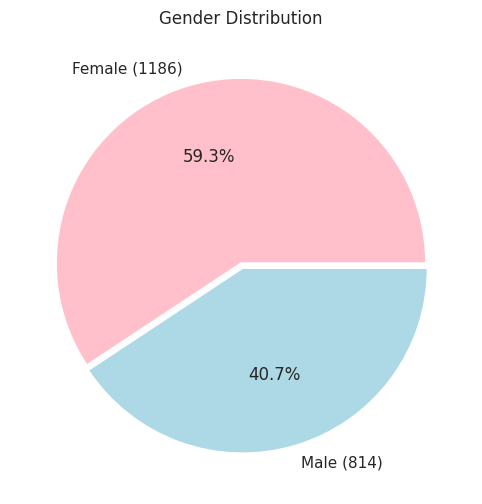

In [60]:
# pie chart of gender distribution
gender_counts = customers['Gender'].value_counts()

labels = [f'{label} ({count})' for label, count in gender_counts.items()]
explode = (0, 0.03)

plt.figure(figsize=(10,6))
plt.pie(gender_counts, explode=explode, labels=labels, autopct='%1.1f%%', colors=['pink', 'lightblue'])
plt.title('Gender Distribution')
plt.show()

## Age

Min Age: 0 years
Max Age: 99 years
Standard Deviation: 28.43
Average Age: 48.96
Average Male Age: 49.16
Average Female Age: 48.82


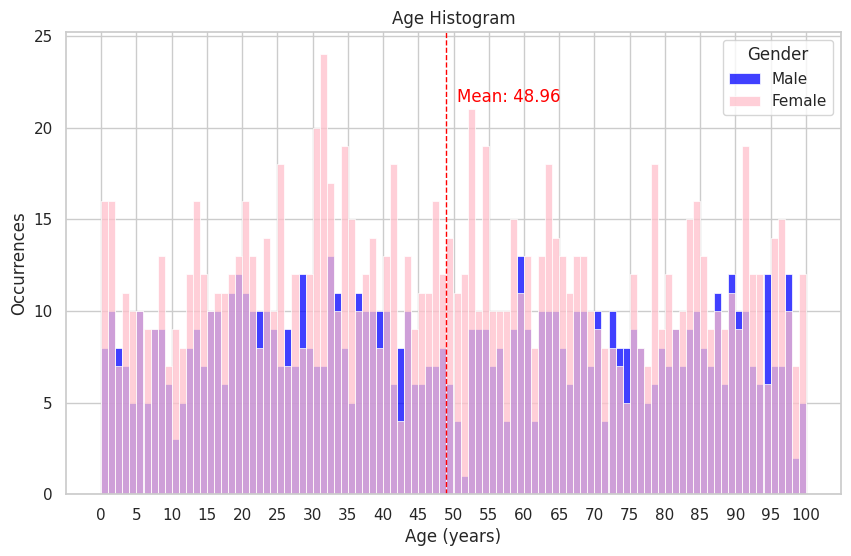

In [61]:
# get minimum and maximum age
min_age = customers['Age'].min()
max_age = customers['Age'].max()

print('Min Age: {:.0f} years'.format(min_age))
print('Max Age: {:.0f} years'.format(max_age))

# calculate average age
average_age = customers['Age'].mean()

# calculate standard deviation
std_age = customers['Age'].std()
print('Standard Deviation: {:.2f}'.format(std_age))

# separate age by gender
male_customers = customers[customers['Gender'] == 'Male']
female_customers = customers[customers['Gender'] == 'Female']

# calculate average age by gender
average_male_age = male_customers['Age'].mean()
average_female_age = female_customers['Age'].mean()

print('Average Age: {:.2f}'.format(average_age))
print('Average Male Age: {:.2f}'.format(average_male_age))
print('Average Female Age: {:.2f}'.format(average_female_age))

# create histograms
plt.figure(figsize=(10,6))
sns.histplot(male_customers['Age'], bins=range(0, max_age + 2), color='blue', label='Male')
sns.histplot(female_customers['Age'], bins=range(0, max_age + 2), color='pink', label='Female')
plt.xticks(np.arange(min_age, max_age + 2, 5))

# add average lines
plt.axvline(average_age, color='red', linestyle='dashed', linewidth=1)
# plt.axvline(average_male_age, color='blue', linestyle='dashed', linewidth=1)
# plt.axvline(average_female_age, color='pink', linestyle='dashed', linewidth=1)

# add text near the lines
plt.text(average_age * 1.03, plt.ylim()[1] * 0.85, 'Mean: {:.2f}'.format(average_age), color='red')
# plt.text(average_male_age * 1.03, plt.ylim()[1] * 0.85, 'Mean: {:.2f}'.format(average_male_age), color='blue')
# plt.text(average_female_age * 1.03, plt.ylim()[1] * 0.85, 'Mean: {:.2f}'.format(average_female_age), color='pink')

plt.title('Age Histogram')
plt.xlabel('Age (years)')
plt.ylabel('Occurrences')
plt.legend(title='Gender')
plt.show()

## Annual Income

Min Annual Income: $0
Max Annual Income: $189974
Standard Deviation: $45739.54


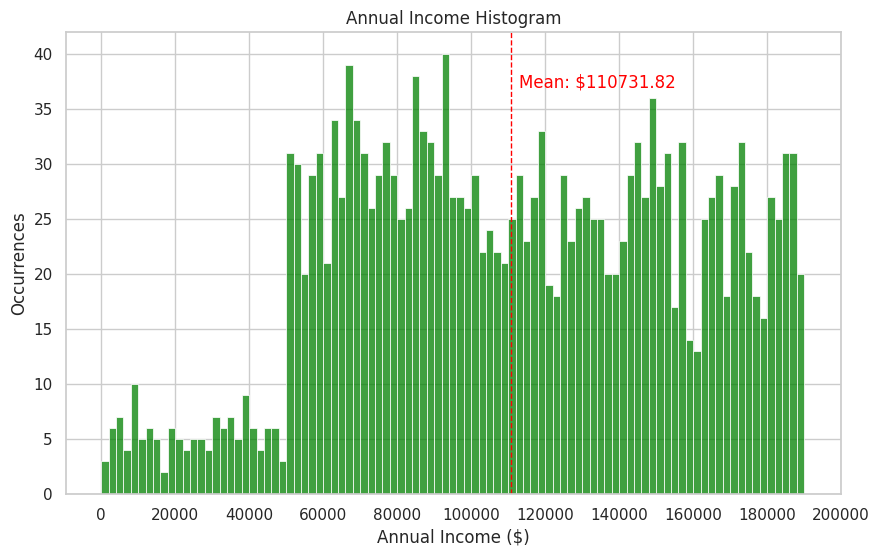

In [62]:
# get minimum and maximum annual income
min_income = customers['Annual Income ($)'].min()
max_income = customers['Annual Income ($)'].max()

print('Min Annual Income: ${:.0f}'.format(min_income))
print('Max Annual Income: ${:.0f}'.format(max_income))

# calculate average annual income
average_income = customers['Annual Income ($)'].mean()

# calculate standard deviation
std_income = customers['Annual Income ($)'].std()
print('Standard Deviation: ${:.2f}'.format(std_income))

# create histograms
plt.figure(figsize=(10,6))
sns.histplot(customers['Annual Income ($)'], bins=range(0, max_income + 2000, 2000), color='green')
plt.xticks(np.arange(min_income, max_income + 20000, 20000))
plt.axvline(average_income, color='red', linestyle='dashed', linewidth=1)

# add text near the lines
plt.text(average_income * 1.02, plt.ylim()[1] * 0.88, 'Mean: ${:.2f}'.format(average_income), color='red')

plt.title('Annual Income Histogram')
plt.xlabel('Annual Income ($)')
plt.ylabel('Occurrences')
plt.show()

## Spending Score

## Profession

Locating the "na" in the data and then taking appropiate action based on the percentage of datapoints with "na".

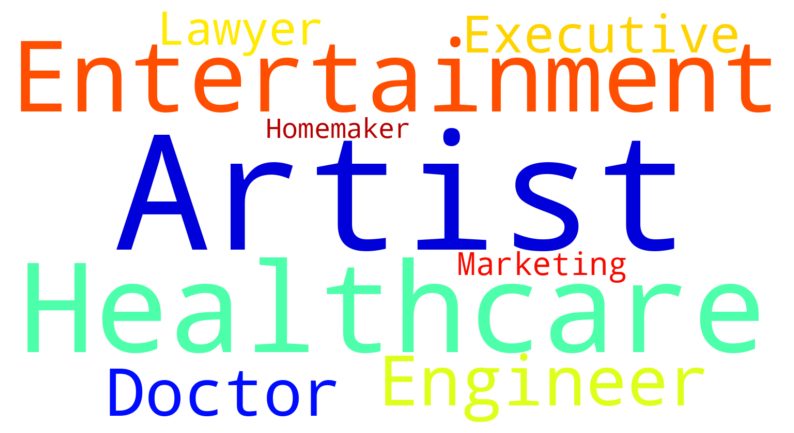

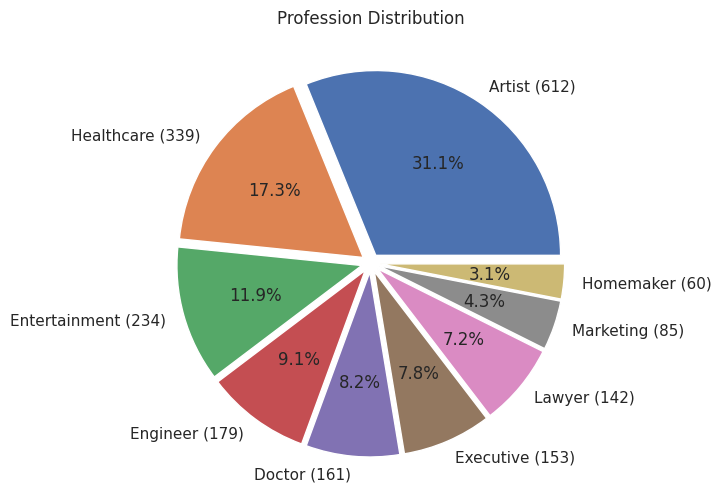

In [63]:
# drop nan values
customers.dropna(subset=['Profession'], inplace=True)

# worldcloud
wordcloud = WordCloud(width=1500, height=800, background_color='white', colormap='jet').generate(' '.join(customers['Profession'].astype(str)))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# pie chart
profession_counts = customers['Profession'].value_counts()

labels = [f'{label} ({count})' for label, count in profession_counts.items()]
explode = (0.05,) * len(profession_counts)

plt.figure(figsize=(10,6))
plt.pie(profession_counts, explode=explode, labels=labels, autopct='%1.1f%%')
plt.title('Profession Distribution')
plt.show()

## Work Experience

Min Work Experience: 0 years
Max Work Experience: 17 years
Standard Deviation: 3.93


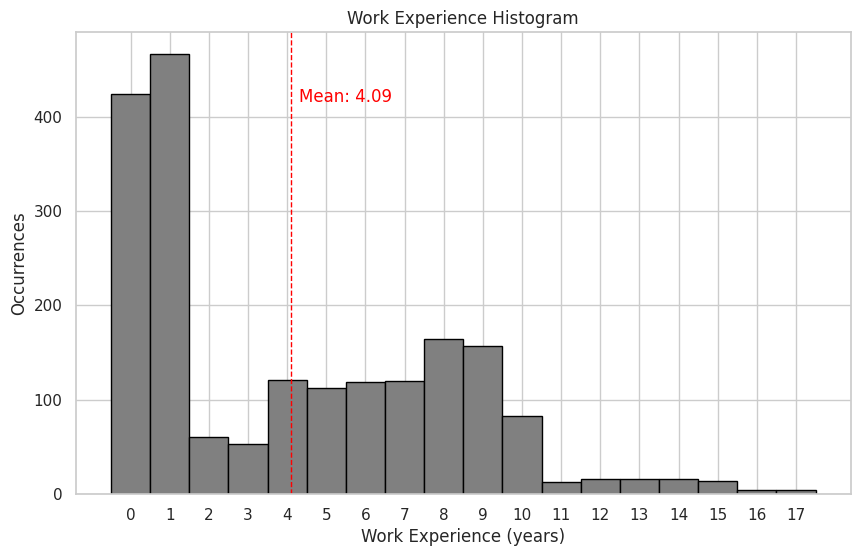

In [64]:
# get minimum and maximum working years
min_work_years = customers['Work Experience'].min()
max_work_years = customers['Work Experience'].max()

print('Min Work Experience: {:.0f} years'.format(min_work_years))
print('Max Work Experience: {:.0f} years'.format(max_work_years))

# calculate average working years
average_work_years = customers['Work Experience'].mean()

# calculate standard deviation
std_work_years = customers['Work Experience'].std()
print('Standard Deviation: {:.2f}'.format(std_work_years))

# create histograms
plt.figure(figsize=(10,6))
plt.hist(customers['Work Experience'], bins=range(0, max_work_years + 2), color='gray', edgecolor='black', align='left')
plt.xticks(np.arange(min_work_years, max_work_years + 1, 1))
plt.axvline(average_work_years, color='red', linestyle='dashed', linewidth=1)
plt.text(average_work_years * 1.05, plt.ylim()[1] * 0.85, 'Mean: {:.2f}'.format(average_work_years), color='red')

plt.title('Work Experience Histogram')
plt.xlabel('Work Experience (years)')
plt.ylabel('Occurrences')
plt.show()

## Family Size

Min Family Size: 1
Max Family Size: 9
Standard Deviation: 1.97


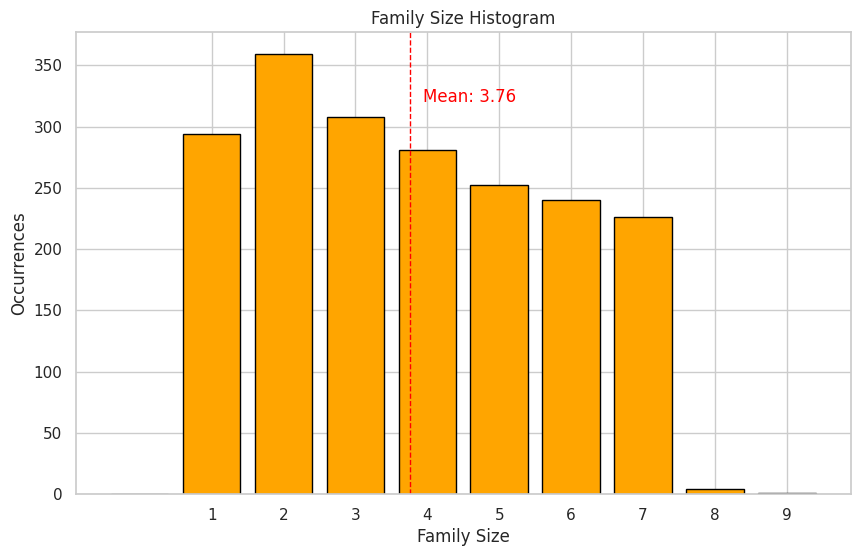

In [65]:
# get minimum and maximum family size
min_family_size = customers['Family Size'].min()
max_family_size = customers['Family Size'].max()

print('Min Family Size: {:.0f}'.format(min_family_size))
print('Max Family Size: {:.0f}'.format(max_family_size))

# calculate average family size
average_family_size = customers['Family Size'].mean()

# calculate standard deviation
std_family_size = customers['Family Size'].std()
print('Standard Deviation: {:.2f}'.format(std_family_size))

# histogram
plt.figure(figsize=(10,6))
plt.hist(customers['Family Size'], bins=range(0, max_family_size + 2), color='orange', edgecolor='black', align='left', rwidth=0.8)
plt.xticks(np.arange(min_family_size, max_family_size + 1, 1))
plt.axvline(average_family_size, color='red', linestyle='dashed', linewidth=1)
plt.text(average_family_size * 1.05, plt.ylim()[1] * 0.85, 'Mean: {:.2f}'.format(average_family_size), color='red')

plt.title('Family Size Histogram')
plt.xlabel('Family Size')
plt.ylabel('Occurrences')
plt.show()

In [69]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1965 non-null   int64 
 1   Gender                  1965 non-null   object
 2   Age                     1965 non-null   int64 
 3   Annual Income ($)       1965 non-null   int64 
 4   Spending Score (1-100)  1965 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         1965 non-null   int64 
 7   Family Size             1965 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 138.2+ KB


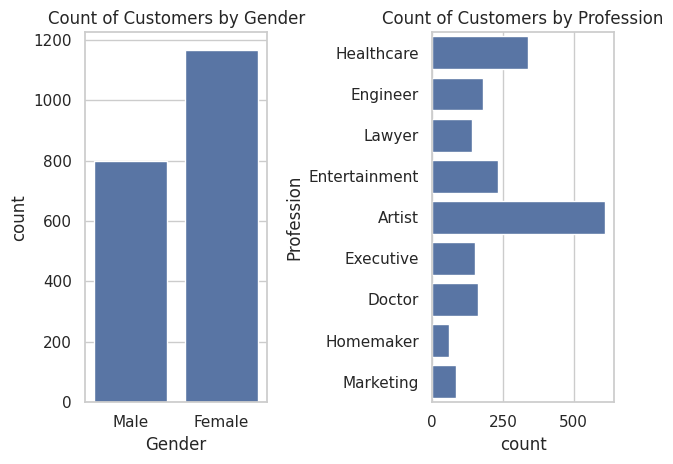

In [70]:
# Countplot for Gender
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=customers)
plt.title('Count of Customers by Gender')

# Countplot for Profession
plt.subplot(1, 2, 2)
sns.countplot(y='Profession', data=customers)
plt.title('Count of Customers by Profession')

plt.tight_layout()
plt.show()

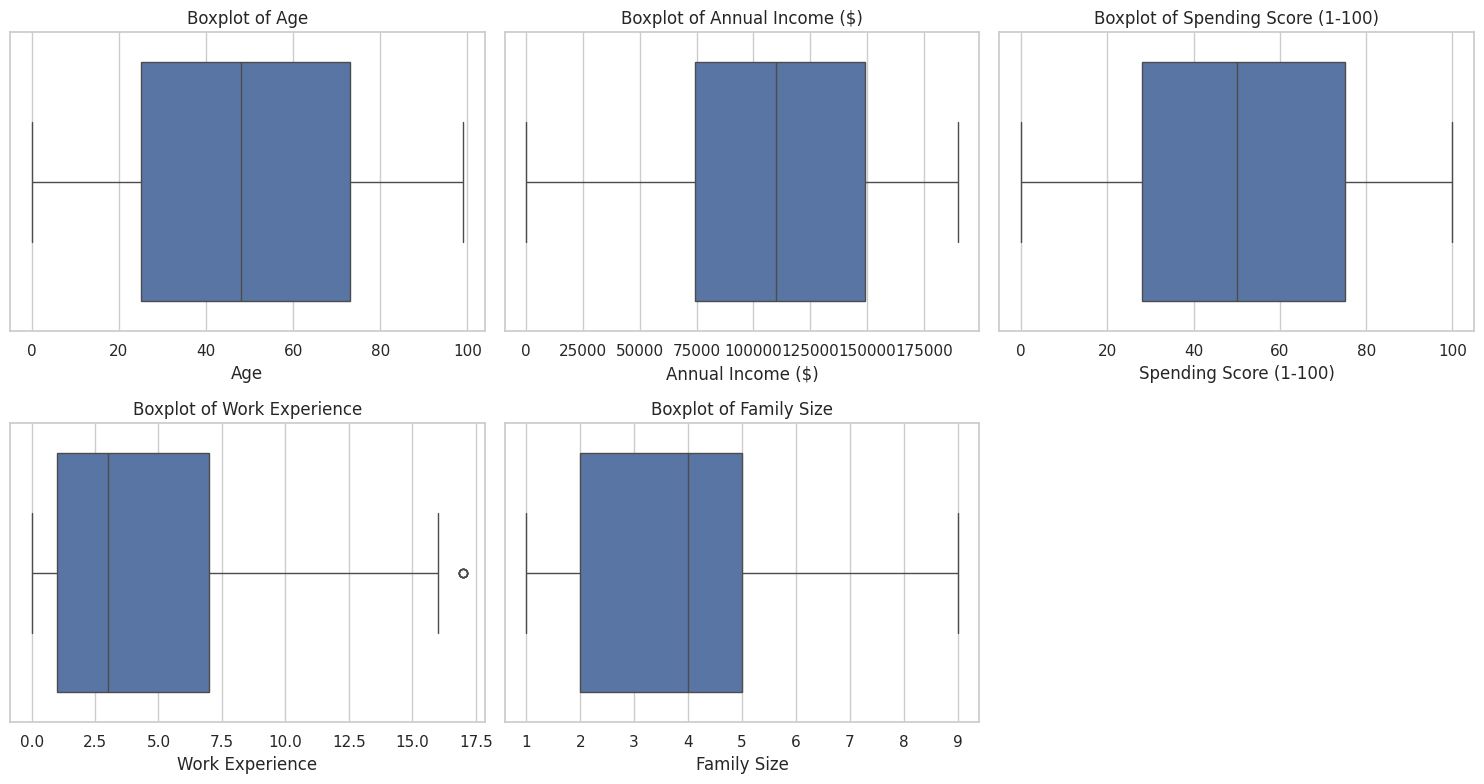

In [71]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size'], start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=customers[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

## Data Cleaning for Age
The boxplot from above shows that the age starts from 0 and extends till 99. Our intution says that people with Age=0 should have zero income. Let's see by locating data entries where age = 0.

In [72]:
customers.loc[customers['Age']==0].describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,23.000000,23.0,23.000000,23.000000,23.000000,23.000000
mean,1060.086957,0.0,117714.521739,57.260870,4.130435,3.956522
std,586.930685,0.0,42685.736640,30.039697,4.267257,2.163294
min,212.000000,0.0,22000.000000,7.000000,0.000000,1.000000
25%,561.500000,0.0,99974.500000,26.500000,1.000000,2.000000
50%,864.000000,0.0,121926.000000,63.000000,2.000000,4.000000
75%,1594.000000,0.0,143682.500000,83.500000,7.500000,6.000000
max,1980.000000,0.0,186002.000000,96.000000,15.000000,7.000000


The minimum age 0 have annual income ranging from 22000 to 186002. This is anomaly, probably a data entry error. So we will remove these data entries. Futhermore we will set the age range from 18 to 99.

In [73]:
customers= customers[customers['Age']>=18]
customers= customers[customers['Age']<=80]

customers.loc[customers['Age']==81]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size


## Professions

In [74]:
distinct_profession = customers['Profession'].unique()
distinct_profession

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing'], dtype=object)

## Work Experience

For work experience, we found any customers with zero work experience. For this we have assumed that:


*   People ranging from age 18 to 30 can have zero work experience since they might be looking for the job.
*   For older than 30, we have replaced the zero experience with the median work experience of customers 5 years younger and older than the customer from same profession.

In [75]:
customers.loc[customers['Work Experience']==0]

for idx, row in customers.iterrows():
    if row['Age'] > 30 and row['Work Experience'] == 0:
        age_range = customers[(customers['Age'] >= row['Age'] - 5) & (customers['Age'] <= row['Age'] + 5) & (customers['Profession'] == row['Profession'])]
        if not age_range.empty:
            median_experience = age_range['Work Experience'].median()
            customers.at[idx, 'Work Experience'] = median_experience

customers.loc[customers['Work Experience']==0]

customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1270 entries, 0 to 1998
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              1270 non-null   int64  
 1   Gender                  1270 non-null   object 
 2   Age                     1270 non-null   int64  
 3   Annual Income ($)       1270 non-null   int64  
 4   Spending Score (1-100)  1270 non-null   int64  
 5   Profession              1270 non-null   object 
 6   Work Experience         1270 non-null   float64
 7   Family Size             1270 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 121.6+ KB


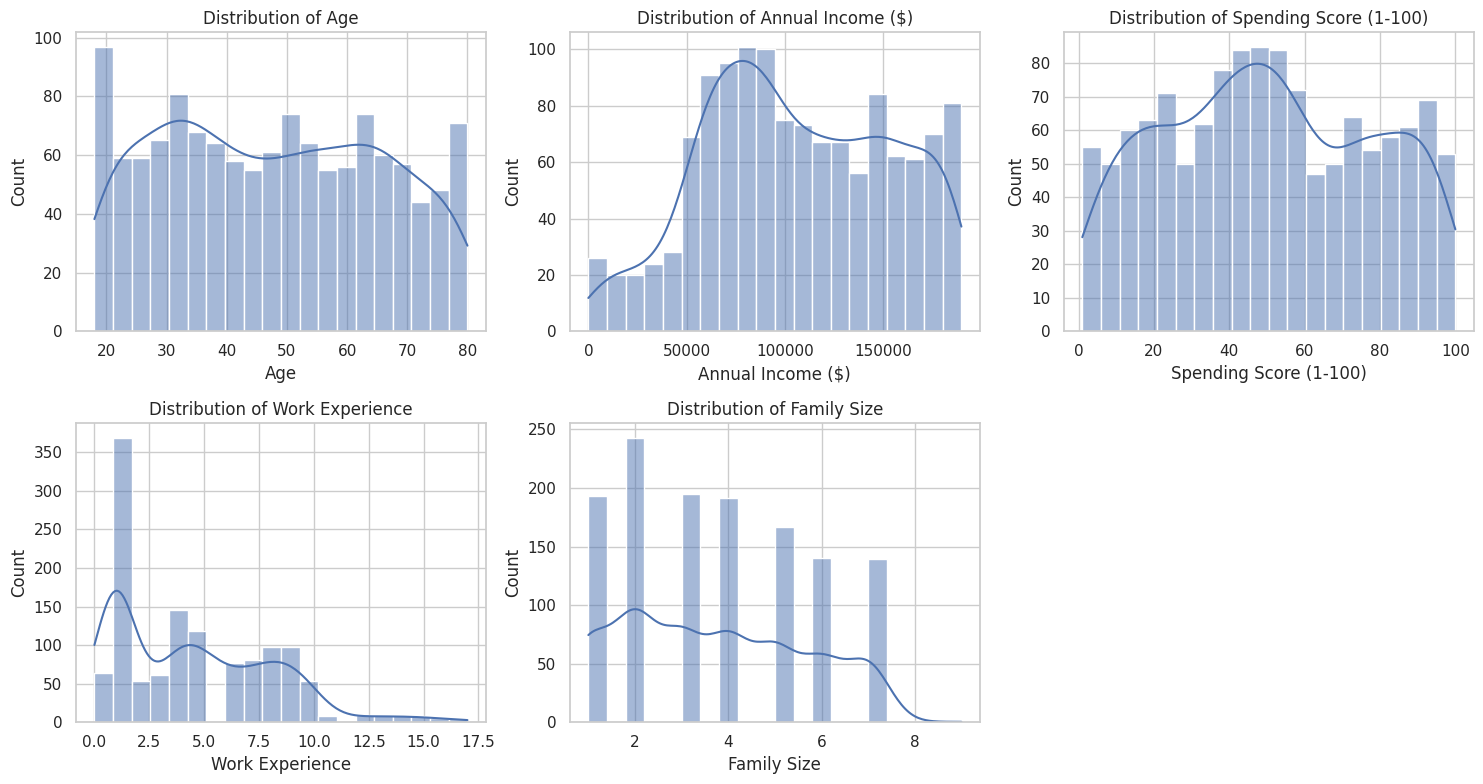

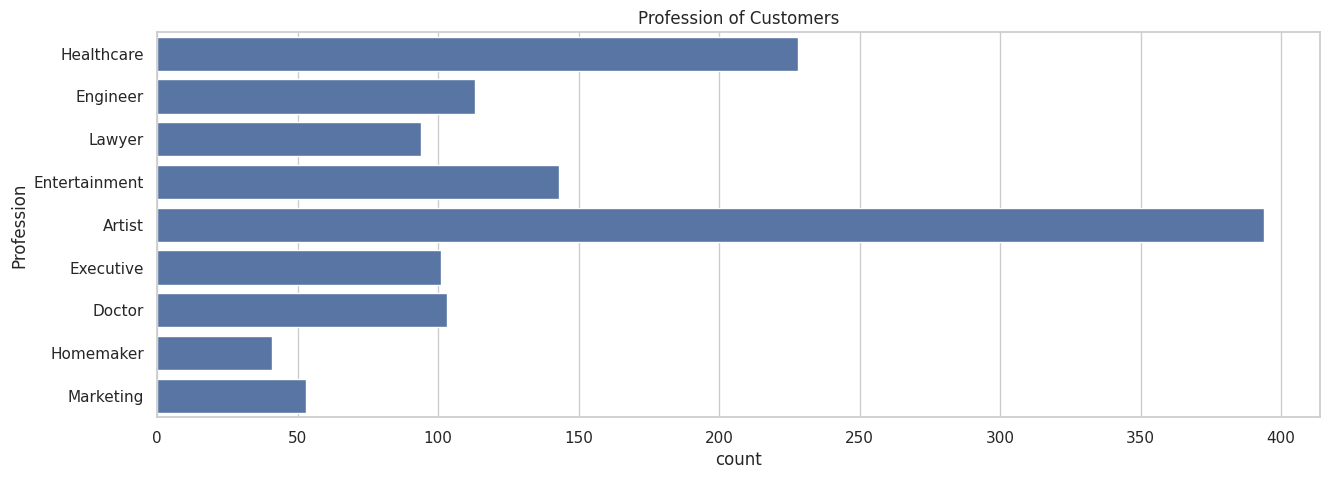

In [44]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Visualizing the distribution of numerical features
plt.figure(figsize=(15, 8))

# Histograms for numerical features
for i, col in enumerate(['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size'], start=1):
    plt.subplot(2, 3, i)
    sns.histplot(customers[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()
plt.figure(1,figsize=(15,5))
sns.countplot(y='Profession', data=customers)
# data['Profession'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, figsize=(5,5))
plt.title('Profession of Customers')
plt.show()

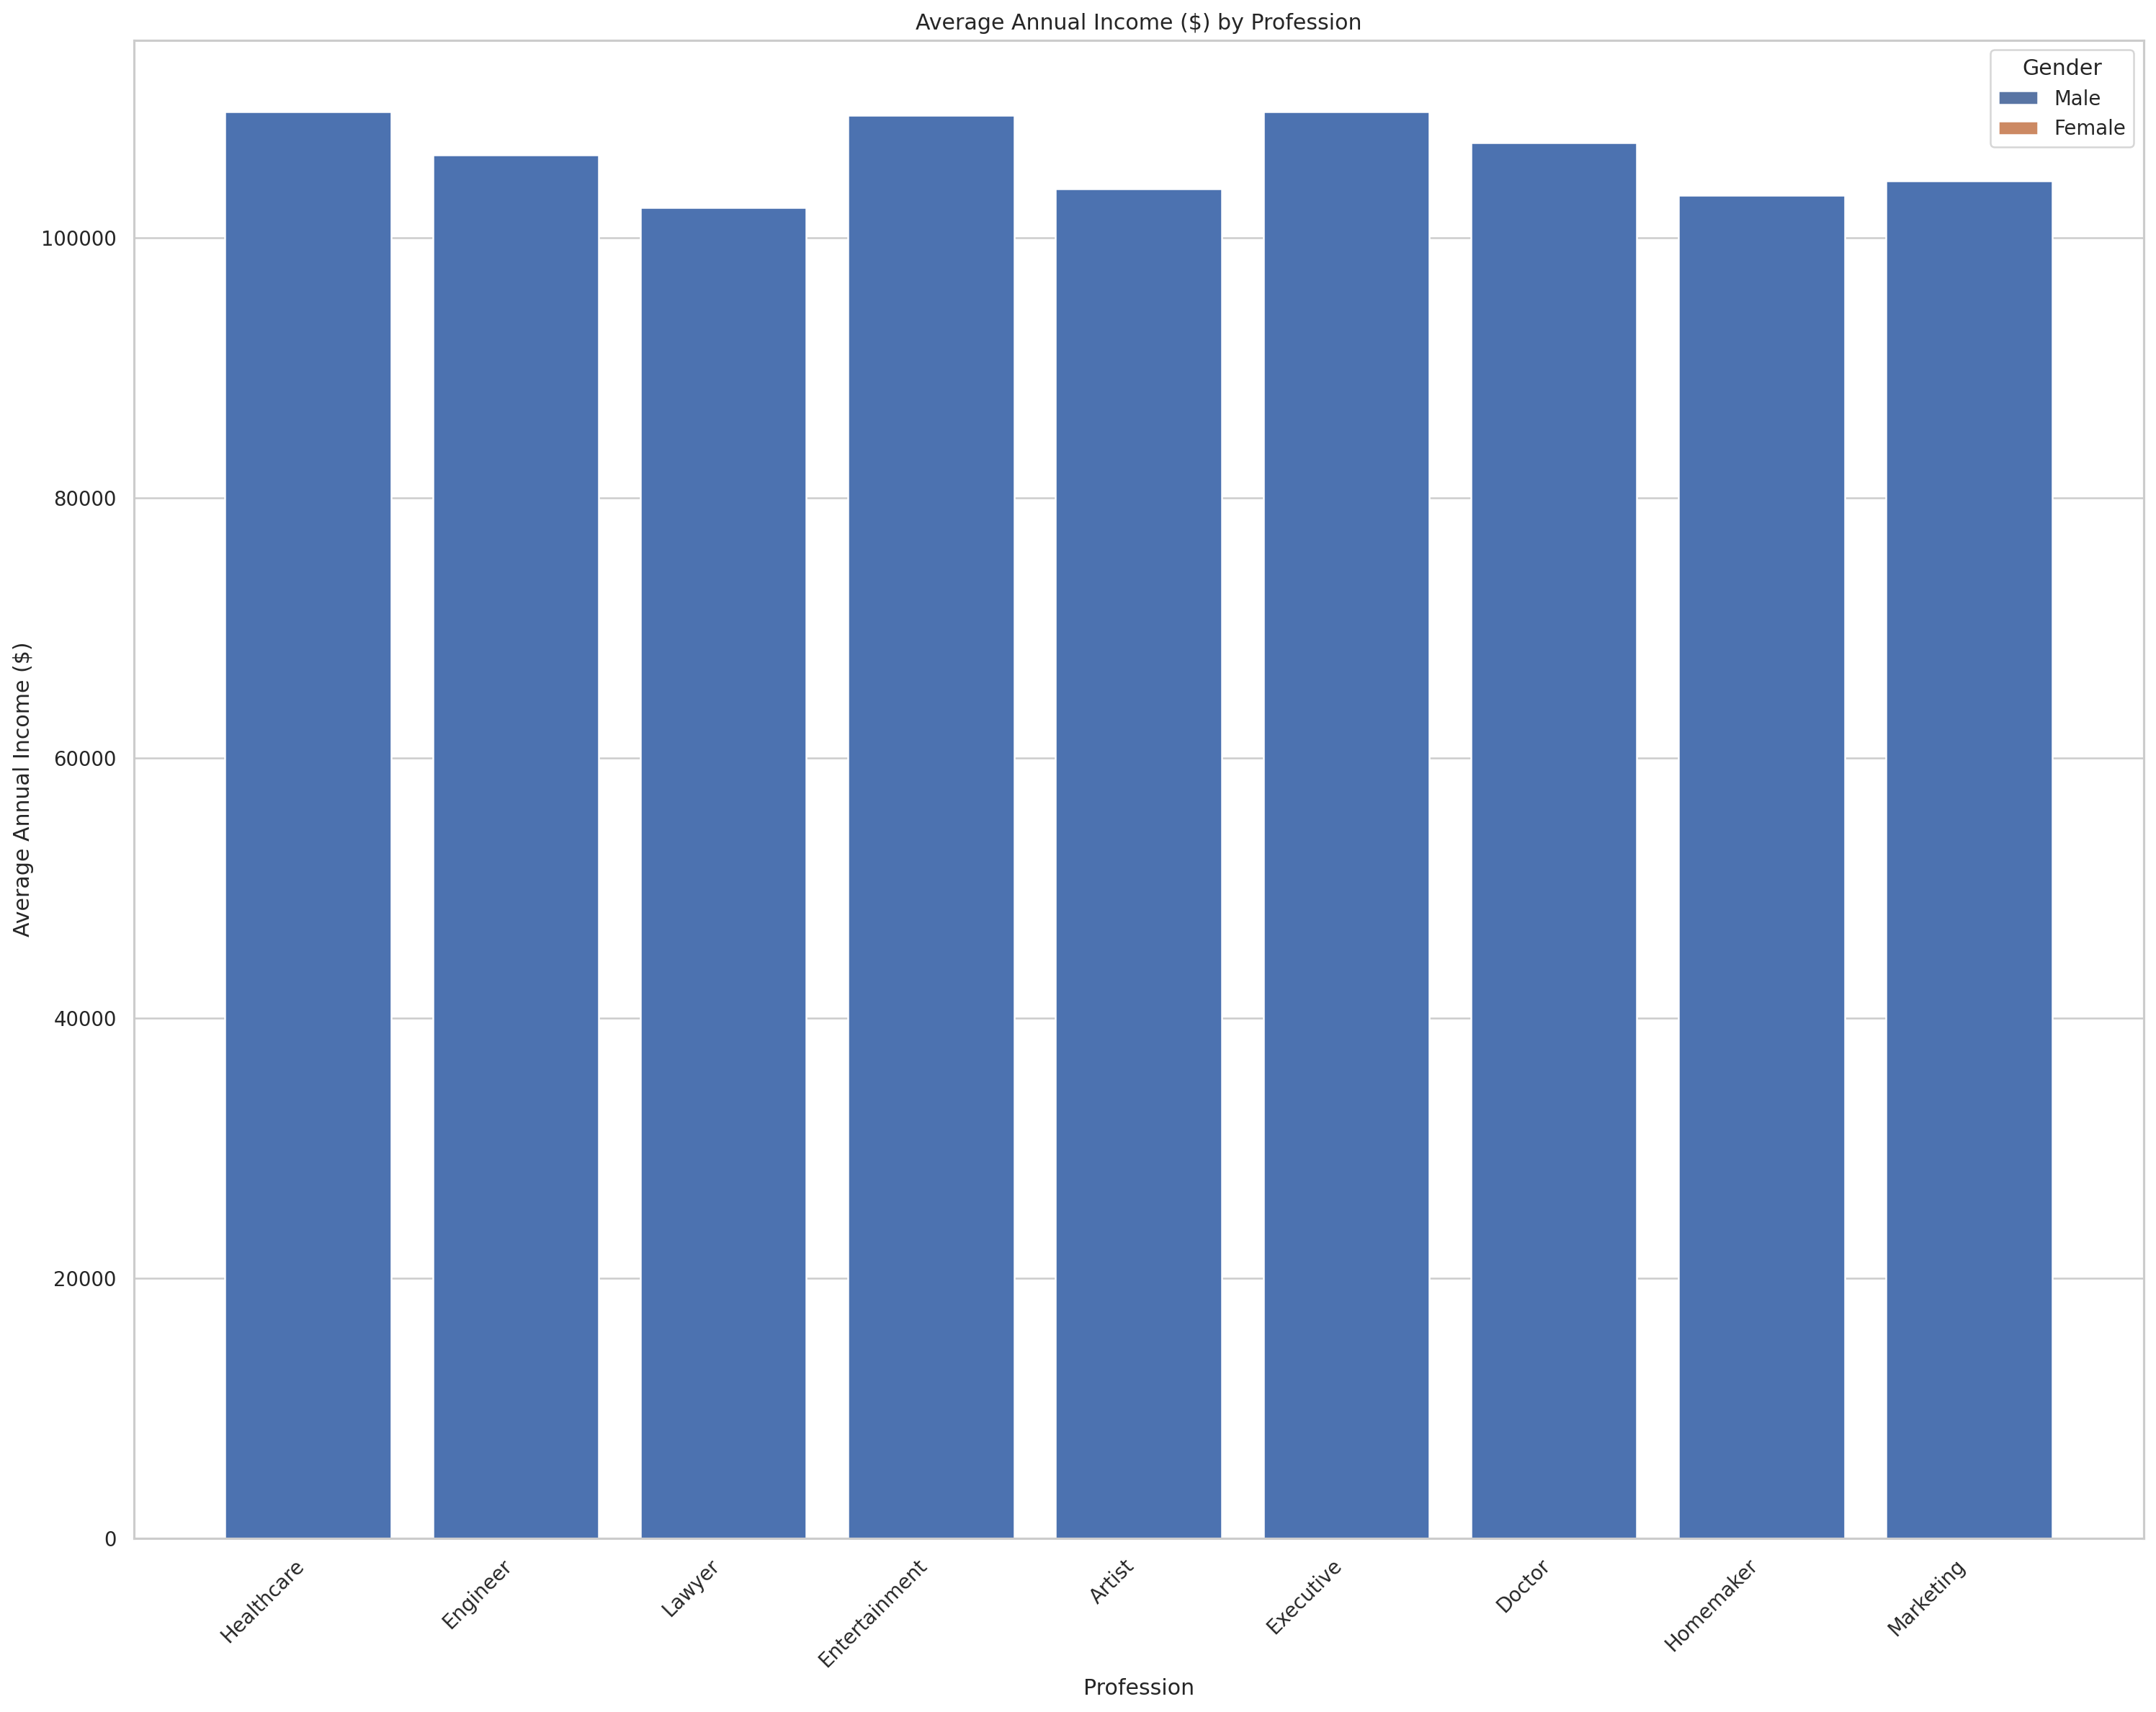

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [50]:
# Number of Male and Female Professions based on the field
plt.figure(figsize=(20,15),dpi=180)
sns.countplot(data = customers,x="Profession",hue="Gender")

# Calculate average Annual Income ($) by age group
age_groups = customers.groupby('Profession')['Annual Income ($)'].mean().reset_index()

# Create column chart
plt.bar(age_groups['Profession'], age_groups['Annual Income ($)'])
plt.title('Average Annual Income ($) by Profession')
plt.xlabel('Profession')
plt.ylabel('Average Annual Income ($)')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

plt.show()

customers.columns




# Data Preprocessing
Handling Categorical Data like Gender and Prefession by converting them to numerical values using encoding

In [47]:
customers_encoded= customers.copy()
# Encode 'Gender' using LabelEncoder
label_encoder = LabelEncoder()
customers_encoded['Gender'] = label_encoder.fit_transform(customers['Gender'])

In [ ]:
# Encode 'Profession' using LabelEncoder
# Note: Handle missing values in 'Profession' before encoding, if needed
customers_encoded['Profession'] = label_encoder.fit_transform(customers['Profession'].astype(str))
# Display the first few rows of the encoded DataFrame
print(customers_encoded.head())

# Correlation Matrix

In [49]:
customers_corr = customers_encoded.copy()
customers_corr = customers_encoded[[ 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size']]

<Axes: >

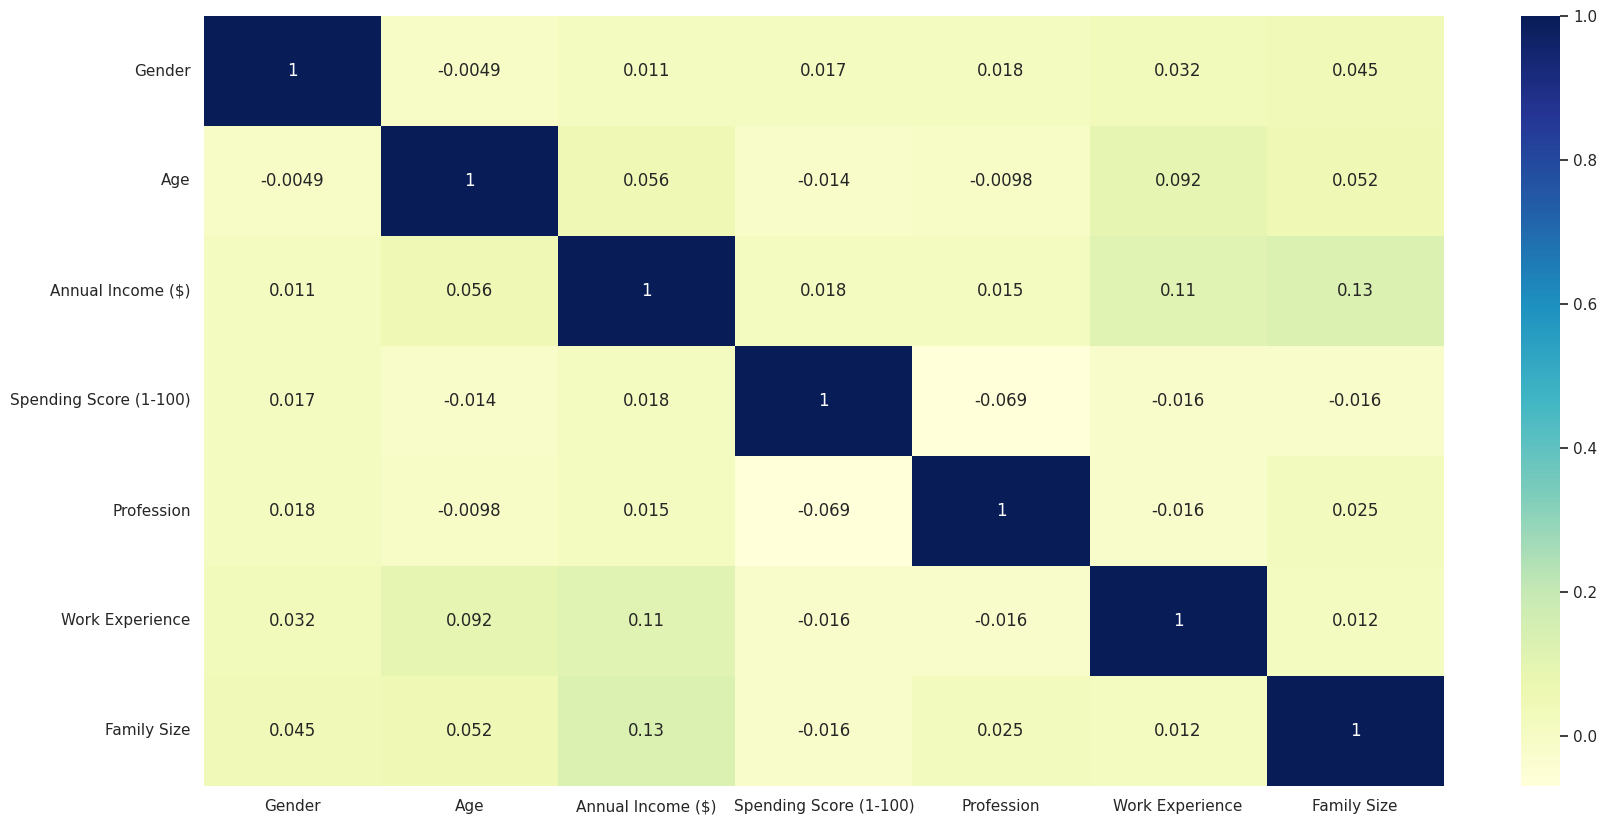

In [48]:
data =customers_corr.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data=customers_corr.corr(), cmap="YlGnBu", annot=True)
